# How Can Machines Learn?

# 1. Starts with Data (PAST)

In [1]:
import numpy as np

In [2]:
X = np.array([-1,0,1,2,3,4])
X

array([-1,  0,  1,  2,  3,  4])

In [3]:
y = np.array([22*X+1])
y

array([[-21,   1,  23,  45,  67,  89]])

# 2. Select a Function to Calculate the Predictions - Linear Function yp = ax+b

In [4]:
yp = []
a = 0
b = 0
# Initialization
epochs = 10
n = len(X)
l = 0.1

In [5]:
np.sum([2,3])

5

# 3. Lets Teach machine

In [6]:
for i in range(epochs):
    for j in range(len(X)):
        yp = a*X+b
        da = (-2/len(X))*np.sum([X*(y-yp)])
        db = (-2/len(X))*np.sum([(y-yp)])
        a = a - l*da
        b = b - l*db
        e = np.sum([(y-yp)**2])
    print('\n The error',e,'after each epoch',i)


 The error 35.0626954107548 after each epoch 0

 The error 9.483821477039223 after each epoch 1

 The error 2.565202796698934 after each epoch 2

 The error 0.693841127663907 after each epoch 3

 The error 0.18767152096412482 after each epoch 4

 The error 0.05076176429548348 after each epoch 5

 The error 0.013730142437982427 after each epoch 6

 The error 0.003713756091493296 after each epoch 7

 The error 0.0010045040952341947 after each epoch 8

 The error 0.000271700255074361 after each epoch 9


In [7]:
yp

array([-20.98821069,   1.00891409,  23.00603888,  45.00316367,
        67.00028845,  88.99741324])

In [8]:
e

0.000271700255074361

In [9]:
a

21.997421612141835

In [10]:
b

1.0079938394198242

# The equation you selected for prediction is called the MODEL.

# The variables a and b are called Model paramters or Trainable Parameters

# The error in this case is Mean Square Error

# The learning rate and number of epochs are called hyperparameters of the model which is the choice of the user

In [11]:
a = 0
b = 0 
yp = 0 
e = 0
from numpy.random import default_rng
a = default_rng(42).random()
b = default_rng(42).random()

In [12]:
for i in range(epochs):
    for j in range(len(X)):
        yp = a*X+b
        da = (-2/len(X))*np.sum([X*(y-yp)])
        db = (-2/len(X))*np.sum([(y-yp)])
        a = a - l*da
        b = b - l*db
        e = np.sum([(y-yp)**2])
    print('\n The error',e,'after each epoch',i)


 The error 41.3535500427524 after each epoch 0

 The error 11.185384799374448 after each epoch 1

 The error 3.025445010640032 after each epoch 2

 The error 0.8183283522725697 after each epoch 3

 The error 0.22134307177226265 after each epoch 4

 The error 0.059869311976694865 after each epoch 5

 The error 0.016193569953934523 after each epoch 6

 The error 0.004380068839859403 after each epoch 7

 The error 0.0011847296857016398 after each epoch 8

 The error 0.0003204480293572858 after each epoch 9


In [13]:
print(yp)

[-20.9871967    1.00968079  23.00655828  45.00343577  67.00031326
  88.99719075]


# Lets Use it on a real dataset : tvmarketing

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('tvmarketing.csv')

In [16]:
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


# Number of Hours of avertizing a product Vs the corresponding sales increment or decrement.

In [17]:
df.shape

(200, 2)

In [18]:
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [19]:
print(df.isnull().any()) # To Check the dataset

TV       False
Sales    False
dtype: bool


In [20]:
X = df.iloc[:,0]
X

0      230.1
1       44.5
2       17.2
3      151.5
4      180.8
       ...  
195     38.2
196     94.2
197    177.0
198    283.6
199    232.1
Name: TV, Length: 200, dtype: float64

In [21]:
y = df.iloc[:,1]
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [22]:
X = np.array(X)
y = np.array(y)

# Split data into training and testing

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140,)
(60,)
(140,)
(60,)


In [26]:
X_train,y_train

(array([284.3, 184.9, 112.9,  23.8, 290.7,  19.4, 293.6,  18.7, 134.3,
         25.6, 100.4,  80.2, 188.4, 177. , 125.7, 209.6, 142.9, 184.9,
        222.4, 241.7,  17.2, 120.5,  89.7, 191.1,  75.5, 193.2,  85.7,
        266.9,  39.5, 261.3,  13.2, 193.7, 296.4, 265.6, 214.7, 149.7,
        131.7,  57.5, 240.1, 141.3, 180.8,  97.2, 220.5, 140.3, 255.4,
         96.2,  66.1, 239.3, 175.7, 240.1,  17.9, 230.1, 283.6, 171.3,
        199.1, 123.1, 131.1,  25.1, 163.5, 248.8, 202.5,  13.1,   4.1,
         93.9, 262.9, 228.3, 253.8, 243.2, 239.8, 228. , 215.4, 239.9,
        107.4, 187.8, 206.9,  43. , 151.5, 137.9, 182.6, 219.8, 156.6,
        276.7, 205. ,  66.9,  76.4,  95.7, 120.2, 225.8,  28.6,  68.4,
        248.4, 218.5, 109.8,   8.6,  97.5, 210.7, 164.5, 265.2, 281.4,
         26.8, 276.9,  36.9, 206.8, 287.6, 102.7, 262.7,  90.4, 199.8,
         94.2, 210.8, 227.2,  88.3, 237.4, 136.2, 172.5,  17.2,  59.6,
         74.7, 149.8, 166.8,  44.5, 216.4,  44.7,   0.7, 121. , 187.9,
      

# Initialize the Model

In [47]:
a = 0
b = 0 
yp = 0 
e = 0
from numpy.random import default_rng
a = default_rng(42).random()
b = default_rng(42).random()
l = 0.000001
epochs = 55000

In [48]:
for i in range(epochs):
    for j in range(len(X_train)):
        yp = a*X_train+b
        da = (-2/len(X))*np.sum([X_train*(y_train-yp)])
        db = (-2/len(X))*np.sum([(y_train-yp)])
        a = a - l*da
        b = b - l*db
        e = np.sum([(y_train-yp)**2])

In [49]:
a

0.04933872060492669

In [50]:
b

6.650119522857754

In [51]:
e

1577.2812605926429

In [52]:
import matplotlib.pyplot as plt

In [53]:
yp = a*X_test+b

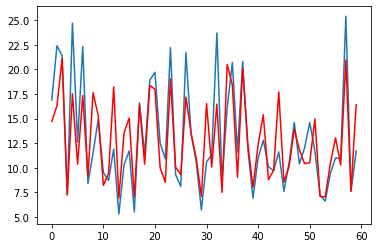

In [54]:
plt.plot(y_test)
plt.plot(yp,'r')

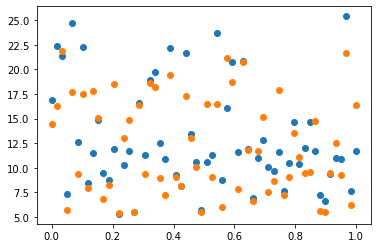

In [46]:
X1 = np.linspace(0,1,60)
plt.scatter(X1,y_test)
plt.scatter(X1,yp)